In [2]:
import numpy as np 
import pandas as pd

In [3]:
df=pd.read_csv('./datasets/Ahmedabad_rent.csv')
df.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,2,BHK,Apartment,Bodakdev,"20,000",1450,Furnished,2 bathrooms
1,OWNER,1,RK,Studio Apartment,CG Road,"7,350",210,Semi-Furnished,1 bathrooms
2,OWNER,3,BHK,Apartment,Jodhpur,"22,000",1900,Unfurnished,3 bathrooms
3,OWNER,2,BHK,Independent House,Sanand,"13,000",1285,Semi-Furnished,2 bathrooms
4,OWNER,2,BHK,Independent House,Navrangpura,"18,000",1600,Furnished,2 bathrooms


In [4]:
df.drop(columns=['seller_type','layout_type','bathroom'],inplace=True)
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,2,Apartment,Bodakdev,"20,000",1450,Furnished
1,1,Studio Apartment,CG Road,"7,350",210,Semi-Furnished
2,3,Apartment,Jodhpur,"22,000",1900,Unfurnished
3,2,Independent House,Sanand,"13,000",1285,Semi-Furnished
4,2,Independent House,Navrangpura,"18,000",1600,Furnished


In [5]:
df.shape

(18540, 6)

In [6]:
df.isnull().sum()

bedroom          0
property_type    0
locality         0
price            0
area             0
furnish_type     0
dtype: int64

In [7]:
df['price'] = df['price'].str.replace(r'[^\d.]+', '', regex=True)

In [8]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [9]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type
0,2,Apartment,Bodakdev,20000.0,1450,Furnished
1,1,Studio Apartment,CG Road,7350.0,210,Semi-Furnished
2,3,Apartment,Jodhpur,22000.0,1900,Unfurnished
3,2,Independent House,Sanand,13000.0,1285,Semi-Furnished
4,2,Independent House,Navrangpura,18000.0,1600,Furnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18540 entries, 0 to 18539
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        18540 non-null  int64  
 1   property_type  18540 non-null  object 
 2   locality       18540 non-null  object 
 3   price          18540 non-null  float64
 4   area           18540 non-null  int64  
 5   furnish_type   18540 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 869.2+ KB


In [11]:
df["house_price"] = (df["price"] * 12 * 100) / 3

In [12]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,2,Apartment,Bodakdev,20000.0,1450,Furnished,8000000.0
1,1,Studio Apartment,CG Road,7350.0,210,Semi-Furnished,2940000.0
2,3,Apartment,Jodhpur,22000.0,1900,Unfurnished,8800000.0
3,2,Independent House,Sanand,13000.0,1285,Semi-Furnished,5200000.0
4,2,Independent House,Navrangpura,18000.0,1600,Furnished,7200000.0


In [13]:
df.bedroom.value_counts()

bedroom
3     7980
2     7428
4     1670
1     1308
5      132
6       14
7        3
10       2
8        2
15       1
Name: count, dtype: int64

In [14]:
df = df[df['bedroom'] <= 5]

In [15]:
df.property_type.value_counts()

property_type
Apartment            16837
Independent House      715
Villa                  638
Studio Apartment       175
Independent Floor      140
Penthouse               13
Name: count, dtype: int64

In [16]:
df["property_type"] = df["property_type"].replace("Studio Apartment", "Apartment")
df["property_type"] = df["property_type"].replace("Independent Floor", "Villa")
df["property_type"] = df["property_type"].replace("Penthouse", "Villa")

In [17]:
df.head()

,bedroom,property_type,locality,price,area,furnish_type,house_price
0,2,Apartment,Bodakdev,20000.0,1450,Furnished,8000000.0
1,1,Apartment,CG Road,7350.0,210,Semi-Furnished,2940000.0
2,3,Apartment,Jodhpur,22000.0,1900,Unfurnished,8800000.0
3,2,Independent House,Sanand,13000.0,1285,Semi-Furnished,5200000.0
4,2,Independent House,Navrangpura,18000.0,1600,Furnished,7200000.0


In [18]:
df.locality.value_counts().describe()

count     203.000000
mean       91.221675
std       308.381330
min         1.000000
25%         1.000000
50%         4.000000
75%        24.000000
max      2941.000000
Name: count, dtype: float64

In [19]:
locality_counts = df["locality"].value_counts()
df = df[df["locality"].isin(locality_counts[locality_counts >=10].index)]

In [20]:
df.locality.nunique()

77

In [21]:
df.shape

(18215, 7)

In [22]:
df.furnish_type.value_counts()

furnish_type
Semi-Furnished    7864
Furnished         6563
Unfurnished       3788
Name: count, dtype: int64

In [23]:
df["furnish_type"] = df["furnish_type"].replace("Semi-Furnished", "Furnished")

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x800 with 0 Axes>

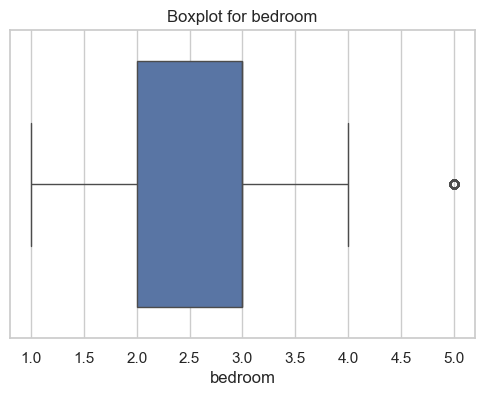

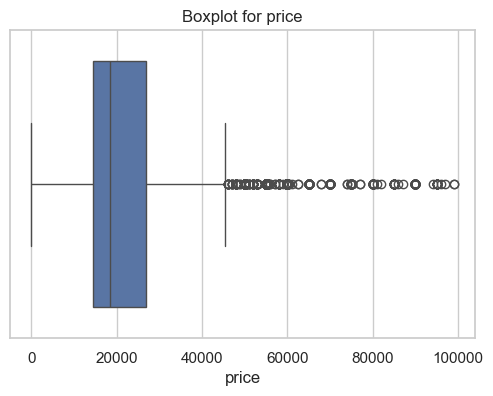

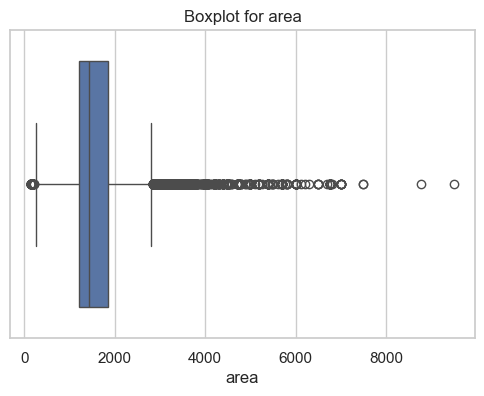

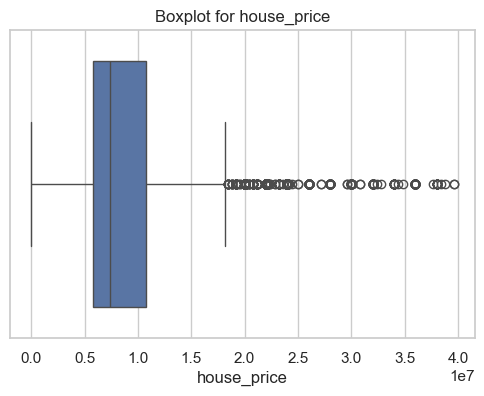

In [25]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

df_numeric = df.select_dtypes(include=['float64', 'int64'])  
for column in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [26]:
for column in df_numeric.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [27]:
df.shape

(16076, 7)

In [28]:
df.drop(columns=['price'],inplace=True)

In [29]:
df.rename(columns={'house_price': 'price'}, inplace=True)

In [30]:
df.head()

,bedroom,property_type,locality,area,furnish_type,price
0,2,Apartment,Bodakdev,1450,Furnished,8000000.0
2,3,Apartment,Jodhpur,1900,Unfurnished,8800000.0
3,2,Independent House,Sanand,1285,Furnished,5200000.0
4,2,Independent House,Navrangpura,1600,Furnished,7200000.0
6,1,Apartment,Vejalpur,570,Unfurnished,3400000.0


In [31]:
df = pd.get_dummies(df).astype(int)

In [32]:
df['price'] = df['price'] / 100000

In [33]:
df.head()

,bedroom,area,price,property_type_Apartment,property_type_Independent House,property_type_Villa,locality_Ambavadi,locality_Ambli,locality_Bhat,locality_Bodakdev,...,locality_Tragad,locality_Usman Pura,locality_Vasna,locality_Vastral,locality_Vastrapur,locality_Vatva,locality_Vejalpur,locality_new c g road chandkheda,furnish_type_Furnished,furnish_type_Unfurnished
0,2,1450,80.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,1900,88.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1285,52.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,1600,72.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,570,34.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [34]:
df.shape

(16076, 85)

In [35]:
df.columns = df.columns.str.lower()

In [36]:
df.head()

,bedroom,area,price,property_type_apartment,property_type_independent house,property_type_villa,locality_ambavadi,locality_ambli,locality_bhat,locality_bodakdev,...,locality_tragad,locality_usman pura,locality_vasna,locality_vastral,locality_vastrapur,locality_vatva,locality_vejalpur,locality_new c g road chandkheda,furnish_type_furnished,furnish_type_unfurnished
0,2,1450,80.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,1900,88.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,1285,52.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,1600,72.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,1,570,34.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [37]:
target=df.price
df.drop(columns=['price'],inplace=True)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df,target,test_size=0.2,random_state=10)

In [39]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.6130388952235841

In [40]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), df,target, cv=cv)

array([0.58773591, 0.62004107, 0.59201381, 0.60145455, 0.58758613])

In [41]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 1, 10],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(df,target)

,model,best_score,best_params
0,linear_regression,0.597766,{'fit_intercept': False}
1,lasso,0.561352,"{'alpha': 0.1, 'selection': 'random'}"
2,decision_tree,0.726150,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [42]:
model=DecisionTreeRegressor(criterion= 'friedman_mse',splitter='random')
model.fit(df,target)
model.score(X_test, y_test)

0.8925178503543197

In [43]:
import pickle
with open('Ahmedabad_model.pickle','wb') as f:
    pickle.dump(model,f)

In [44]:
import json
columns = {
    'data_columns' : [col.lower() for col in df.columns]
}
with open("Ahmedabad_columns.json","w") as f:
    f.write(json.dumps(columns))